# PatternChroma-41K: A Large-Scale Annotated Benchmark for Color-Emotion Analysis in Visual Patterns

### Dataset Overview

PatternChroma-41K is a comprehensive dataset containing detailed color and emotional analysis of 41,015 pattern images, providing a standardized benchmark for computational design, color psychology, affective computing, and pattern recognition applications.

In [1]:
import json
from collections import Counter
import statistics
import math

# Load the dataset
with open("Metadata.json", "r", encoding="utf-8") as f:
    data = json.load(f)

images = data["images"]
n = len(images)

print("="*80)
print("COMPREHENSIVE DATASET ANALYSIS")
print(f"Dataset Size: N = {n:,} images")
print("="*80)

COMPREHENSIVE DATASET ANALYSIS
Dataset Size: N = 41,015 images


In [2]:
# ============================================================================
# SECTION 1: DESCRIPTIVE STATISTICS
# ============================================================================
print("\n" + "="*80)
print("1. DESCRIPTIVE STATISTICS")
print("="*80)

# 1.1 Brightness Analysis
brightness_values = [img['brightness'] for img in images]
brightness_mean = statistics.mean(brightness_values)
brightness_median = statistics.median(brightness_values)
brightness_std = statistics.stdev(brightness_values)
brightness_min = min(brightness_values)
brightness_max = max(brightness_values)

print("\n1.1 Brightness Distribution")
print(f"  Mean (μ): {brightness_mean:.4f}")
print(f"  Median: {brightness_median:.4f}")
print(f"  Standard Deviation (σ): {brightness_std:.4f}")
print(f"  Range: [{brightness_min:.4f}, {brightness_max:.4f}]")
print(f"  Coefficient of Variation: {(brightness_std/brightness_mean)*100:.2f}%")

# Brightness categories
bright_images = sum(1 for b in brightness_values if b > 0.7)
medium_images = sum(1 for b in brightness_values if 0.3 <= b <= 0.7)
dark_images = sum(1 for b in brightness_values if b < 0.3)
print(f"  Bright (>0.7): {bright_images} ({bright_images/n*100:.2f}%)")
print(f"  Medium (0.3-0.7): {medium_images} ({medium_images/n*100:.2f}%)")
print(f"  Dark (<0.3): {dark_images} ({dark_images/n*100:.2f}%)")

# 1.2 Saturation Analysis
saturation_values = [img['saturation'] for img in images]
saturation_mean = statistics.mean(saturation_values)
saturation_median = statistics.median(saturation_values)
saturation_std = statistics.stdev(saturation_values)
saturation_min = min(saturation_values)
saturation_max = max(saturation_values)

print("\n1.2 Saturation Distribution")
print(f"  Mean (μ): {saturation_mean:.4f}")
print(f"  Median: {saturation_median:.4f}")
print(f"  Standard Deviation (σ): {saturation_std:.4f}")
print(f"  Range: [{saturation_min:.4f}, {saturation_max:.4f}]")
print(f"  Coefficient of Variation: {(saturation_std/saturation_mean)*100:.2f}%")

# Saturation categories
high_sat = sum(1 for s in saturation_values if s > 0.6)
medium_sat = sum(1 for s in saturation_values if 0.3 <= s <= 0.6)
low_sat = sum(1 for s in saturation_values if s < 0.3)
print(f"  High Saturation (>0.6): {high_sat} ({high_sat/n*100:.2f}%)")
print(f"  Medium Saturation (0.3-0.6): {medium_sat} ({medium_sat/n*100:.2f}%)")
print(f"  Low Saturation (<0.3): {low_sat} ({low_sat/n*100:.2f}%)")

# 1.3 Contrast Analysis
contrast_values = [img['contrast'] for img in images]
contrast_mean = statistics.mean(contrast_values)
contrast_median = statistics.median(contrast_values)
contrast_std = statistics.stdev(contrast_values)
contrast_min = min(contrast_values)
contrast_max = max(contrast_values)

print("\n1.3 Contrast Distribution")
print(f"  Mean (μ): {contrast_mean:.4f}")
print(f"  Median: {contrast_median:.4f}")
print(f"  Standard Deviation (σ): {contrast_std:.4f}")
print(f"  Range: [{contrast_min:.4f}, {contrast_max:.4f}]")
print(f"  Coefficient of Variation: {(contrast_std/contrast_mean)*100:.2f}%")



1. DESCRIPTIVE STATISTICS

1.1 Brightness Distribution
  Mean (μ): 0.5014
  Median: 0.4988
  Standard Deviation (σ): 0.2002
  Range: [0.0000, 0.9978]
  Coefficient of Variation: 39.93%
  Bright (>0.7): 7458 (18.18%)
  Medium (0.3-0.7): 26309 (64.14%)
  Dark (<0.3): 7248 (17.67%)

1.2 Saturation Distribution
  Mean (μ): 0.4793
  Median: 0.4686
  Standard Deviation (σ): 0.2334
  Range: [0.0000, 1.0000]
  Coefficient of Variation: 48.69%
  High Saturation (>0.6): 13118 (31.98%)
  Medium Saturation (0.3-0.6): 17416 (42.46%)
  Low Saturation (<0.3): 10481 (25.55%)

1.3 Contrast Distribution
  Mean (μ): 0.1581
  Median: 0.1511
  Standard Deviation (σ): 0.0782
  Range: [0.0000, 0.4977]
  Coefficient of Variation: 49.44%


In [3]:
# ============================================================================
# SECTION 2: CATEGORICAL DISTRIBUTION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("2. CATEGORICAL DISTRIBUTION ANALYSIS")
print("="*80)

# 2.1 Color Name Distribution
color_names = [img['color_name'] for img in images]
color_counts = Counter(color_names)
print("\n2.1 Color Name Distribution (n={})".format(len(color_counts)))
print(f"{'Color':<15} {'Count':>10} {'Percentage':>12} {'95% CI':>15}")
print("-" * 55)
for color, count in sorted(color_counts.items(), key=lambda x: x[1], reverse=True):
    p = count / n
    # 95% Confidence Interval for proportion
    se = math.sqrt(p * (1 - p) / n)
    ci = 1.96 * se
    print(f"{color:<15} {count:>10,} {p*100:>11.2f}% [{(p-ci)*100:>5.2f}%, {(p+ci)*100:>5.2f}%]")

# 2.2 Emotion Distribution
emotions = [img['emotion'] for img in images]
emotion_counts = Counter(emotions)
print("\n2.2 Emotion Distribution (n={})".format(len(emotion_counts)))
print(f"{'Emotion':<15} {'Count':>10} {'Percentage':>12} {'95% CI':>15}")
print("-" * 55)
for emotion, count in sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True):
    p = count / n
    se = math.sqrt(p * (1 - p) / n)
    ci = 1.96 * se
    print(f"{emotion:<15} {count:>10,} {p*100:>11.2f}% [{(p-ci)*100:>5.2f}%, {(p+ci)*100:>5.2f}%]")

# 2.3 Contextual Tags Distribution
contextual_tags = [img['contextual'] for img in images]
contextual_counts = Counter(contextual_tags)
print("\n2.3 Contextual Tags Distribution (Top 15, Total n={})".format(len(contextual_counts)))
print(f"{'Context':<20} {'Count':>10} {'Percentage':>12}")
print("-" * 45)
for tag, count in contextual_counts.most_common(15):
    print(f"{tag:<20} {count:>10,} {count/n*100:>11.2f}%")


2. CATEGORICAL DISTRIBUTION ANALYSIS

2.1 Color Name Distribution (n=12)
Color                Count   Percentage          95% CI
-------------------------------------------------------
BLUE                 7,357       17.94% [17.57%, 18.31%]
PURPLE               5,824       14.20% [13.86%, 14.54%]
ORANGE               5,156       12.57% [12.25%, 12.89%]
GRAY                 3,467        8.45% [ 8.18%,  8.72%]
YELLOW               3,260        7.95% [ 7.69%,  8.21%]
RED                  3,182        7.76% [ 7.50%,  8.02%]
GREEN                3,163        7.71% [ 7.45%,  7.97%]
TURQUOISE            2,804        6.84% [ 6.59%,  7.08%]
WHITE                2,649        6.46% [ 6.22%,  6.70%]
PINK                 2,586        6.31% [ 6.07%,  6.54%]
BROWN                1,127        2.75% [ 2.59%,  2.91%]
BLACK                  440        1.07% [ 0.97%,  1.17%]

2.2 Emotion Distribution (n=12)
Emotion              Count   Percentage          95% CI
-----------------------------------------

In [4]:
# ============================================================================
# SECTION 3: CORRELATION AND ASSOCIATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("3. CORRELATION AND ASSOCIATION ANALYSIS")
print("="*80)

# 3.1 Color-Emotion Associations
print("\n3.1 Color-Emotion Association Matrix (Top 20 Combinations)")
color_emotion_pairs = [(img['color_name'], img['emotion']) for img in images]
pair_counts = Counter(color_emotion_pairs)
print(f"{'Color':<12} {'Emotion':<15} {'Count':>8} {'% of Total':>10} {'% of Color':>12}")
print("-" * 60)
for (color, emotion), count in pair_counts.most_common(20):
    pct_total = count / n * 100
    pct_color = count / color_counts[color] * 100
    print(f"{color:<12} {emotion:<15} {count:>8,} {pct_total:>9.2f}% {pct_color:>11.2f}%")

# 3.2 Brightness by Color Name
print("\n3.2 Brightness Statistics by Color Name")
print(f"{'Color':<12} {'N':>8} {'Mean':>8} {'Std':>8} {'Min':>8} {'Max':>8}")
print("-" * 55)
for color in sorted(color_counts.keys(), key=lambda x: color_counts[x], reverse=True):
    color_brightness = [img['brightness'] for img in images if img['color_name'] == color]
    if len(color_brightness) > 1:
        print(f"{color:<12} {len(color_brightness):>8,} {statistics.mean(color_brightness):>8.3f} "
              f"{statistics.stdev(color_brightness):>8.3f} {min(color_brightness):>8.3f} "
              f"{max(color_brightness):>8.3f}")

# 3.3 Saturation by Color Name
print("\n3.3 Saturation Statistics by Color Name")
print(f"{'Color':<12} {'N':>8} {'Mean':>8} {'Std':>8} {'Min':>8} {'Max':>8}")
print("-" * 55)
for color in sorted(color_counts.keys(), key=lambda x: color_counts[x], reverse=True):
    color_saturation = [img['saturation'] for img in images if img['color_name'] == color]
    if len(color_saturation) > 1:
        print(f"{color:<12} {len(color_saturation):>8,} {statistics.mean(color_saturation):>8.3f} "
              f"{statistics.stdev(color_saturation):>8.3f} {min(color_saturation):>8.3f} "
              f"{max(color_saturation):>8.3f}")


3. CORRELATION AND ASSOCIATION ANALYSIS

3.1 Color-Emotion Association Matrix (Top 20 Combinations)
Color        Emotion            Count % of Total   % of Color
------------------------------------------------------------
PURPLE       Imagination        4,045      9.86%       69.45%
BLUE         Sadness            2,728      6.65%       37.08%
ORANGE       Comfort            2,157      5.26%       41.83%
BLUE         Trust              1,834      4.47%       24.93%
TURQUOISE    Calm               1,753      4.27%       62.52%
YELLOW       Comfort            1,624      3.96%       49.82%
ORANGE       Energy             1,466      3.57%       28.43%
PINK         Love               1,348      3.29%       52.13%
GRAY         Peace              1,211      2.95%       34.93%
WHITE        Peace              1,196      2.92%       45.15%
GREEN        Calm               1,172      2.86%       37.05%
RED          Energy               878      2.14%       27.59%
RED          Anger              

In [5]:
# ============================================================================
# SECTION 4: PALETTE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("4. COLOR PALETTE ANALYSIS")
print("="*80)

palette_sizes = [len(img['palette']) for img in images]
print("\n4.1 Palette Size Distribution")
print(f"  Mean: {statistics.mean(palette_sizes):.2f} colors")
print(f"  Median: {statistics.median(palette_sizes):.0f} colors")
print(f"  Mode: {statistics.mode(palette_sizes)} colors")
print(f"  Range: [{min(palette_sizes)}, {max(palette_sizes)}] colors")
print(f"  Standard Deviation: {statistics.stdev(palette_sizes):.2f}")

palette_size_dist = Counter(palette_sizes)
print("\n4.2 Palette Size Frequency")
print(f"{'Size':>6} {'Count':>10} {'Percentage':>12}")
print("-" * 30)
for size in sorted(palette_size_dist.keys()):
    count = palette_size_dist[size]
    print(f"{size:>6} {count:>10,} {count/n*100:>11.2f}%")


4. COLOR PALETTE ANALYSIS

4.1 Palette Size Distribution
  Mean: 6.00 colors
  Median: 6 colors
  Mode: 6 colors
  Range: [6, 6] colors
  Standard Deviation: 0.00

4.2 Palette Size Frequency
  Size      Count   Percentage
------------------------------
     6     41,015      100.00%


In [6]:
# ============================================================================
# SECTION 5: DOMINANT COLOR ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("5. DOMINANT COLOR ANALYSIS")
print("="*80)

dominant_hex = [img['dominant_color']['hex'] for img in images]
hex_counts = Counter(dominant_hex)
print(f"\n5.1 Unique Dominant Colors: {len(hex_counts):,}")
print(f"5.2 Color Diversity Index (Shannon Entropy): ", end="")
total = sum(hex_counts.values())
entropy = -sum((count/total) * math.log2(count/total) for count in hex_counts.values())
print(f"{entropy:.4f}")

print("\n5.3 Top 20 Most Frequent Dominant Colors")
print(f"{'Rank':<6} {'Hex Color':<10} {'RGB':<20} {'Count':>10} {'Percentage':>12}")
print("-" * 60)
for rank, (hex_color, count) in enumerate(hex_counts.most_common(20), 1):
    # Find corresponding RGB
    rgb = next(img['dominant_color']['rgb'] for img in images 
               if img['dominant_color']['hex'] == hex_color)
    rgb_str = f"({rgb[0]}, {rgb[1]}, {rgb[2]})"
    print(f"{rank:<6} {hex_color:<10} {rgb_str:<20} {count:>10,} {count/n*100:>11.2f}%")


5. DOMINANT COLOR ANALYSIS

5.1 Unique Dominant Colors: 38,628
5.2 Color Diversity Index (Shannon Entropy): 15.1370

5.3 Top 20 Most Frequent Dominant Colors
Rank   Hex Color  RGB                       Count   Percentage
------------------------------------------------------------
1      #040404    (4, 4, 4)                   122        0.30%
2      #969696    (150, 150, 150)              63        0.15%
3      #fcd4d4    (252, 212, 212)              42        0.10%
4      #646464    (100, 100, 100)              40        0.10%
5      #cbcbcb    (203, 203, 203)              32        0.08%
6      #f4c4d4    (244, 196, 212)              27        0.07%
7      #050505    (5, 5, 5)                    27        0.07%
8      #9c9c9c    (156, 156, 156)              20        0.05%
9      #fbebd3    (251, 235, 211)              18        0.04%
10     #b4d4f4    (180, 212, 244)              18        0.04%
11     #1c043c    (28, 4, 60)                  16        0.04%
12     #f4f4f4    (244, 

In [7]:
# ============================================================================
# SECTION 6: SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "="*80)
print("6. SUMMARY STATISTICS TABLE")
print("="*80)
print("\nTable 1: Descriptive Statistics of Color Features")
print(f"{'Feature':<15} {'N':>10} {'Mean':>10} {'SD':>10} {'Min':>10} {'Max':>10}")
print("-" * 65)
print(f"{'Brightness':<15} {n:>10,} {brightness_mean:>10.4f} {brightness_std:>10.4f} "
      f"{brightness_min:>10.4f} {brightness_max:>10.4f}")
print(f"{'Saturation':<15} {n:>10,} {saturation_mean:>10.4f} {saturation_std:>10.4f} "
      f"{saturation_min:>10.4f} {saturation_max:>10.4f}")
print(f"{'Contrast':<15} {n:>10,} {contrast_mean:>10.4f} {contrast_std:>10.4f} "
      f"{contrast_min:>10.4f} {contrast_max:>10.4f}")
print(f"{'Palette Size':<15} {n:>10,} {statistics.mean(palette_sizes):>10.2f} "
      f"{statistics.stdev(palette_sizes):>10.2f} {min(palette_sizes):>10.0f} {max(palette_sizes):>10.0f}")


6. SUMMARY STATISTICS TABLE

Table 1: Descriptive Statistics of Color Features
Feature                  N       Mean         SD        Min        Max
-----------------------------------------------------------------
Brightness          41,015     0.5014     0.2002     0.0000     0.9978
Saturation          41,015     0.4793     0.2334     0.0000     1.0000
Contrast            41,015     0.1581     0.0782     0.0000     0.4977
Palette Size        41,015       6.00       0.00          6          6


In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_image_characteristics(axs, image_data):
    """Plot one image with its characteristics into given axes (4 subplots)."""
    img = Image.open(image_data['path'])

    # 1. Show original image
    axs[0].imshow(img)
    axs[0].axis('off')
    axs[0].set_title(f"Image: {image_data['filename']}",
                     fontsize=14, fontweight='bold')

    # 2. Dominant color swatch with Emotion + Context text
    rect = patches.Rectangle((0,0),1,1,color=image_data['dominant_color']['hex'])
    axs[1].add_patch(rect)
    axs[1].axis('off')
    axs[1].set_title("Dominant Color", fontsize=12, fontweight='bold')

    # Add text overlay inside the rectangle
    axs[1].text(0.5, 0.5,
                f"Emotion: {image_data['emotion']}\nContext: {image_data['contextual']}",
                ha='center', va='center',
                fontsize=20, fontweight='bold', color='black',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # 3. Palette colors
    for i, color in enumerate(image_data['palette']):
        axs[2].add_patch(patches.Rectangle((i,0),1,1,color=color['hex']))
    axs[2].set_xlim(0,len(image_data['palette']))
    axs[2].set_ylim(0,1)
    axs[2].axis('off')
    axs[2].set_title("Palette", fontsize=12, fontweight='bold')

    # 4. Metrics bar chart (with distinct colors)
    metrics = ['Brightness','Saturation','Contrast']
    values = [image_data['brightness'], image_data['saturation'], image_data['contrast']]
    bar_colors = ['#555555', '#888888', '#bbbbbb']
    axs[3].bar(metrics, values, color=bar_colors, edgecolor='black')
    axs[3].set_ylim(0,1)
    axs[3].set_title("Metrics", fontsize=12, fontweight='bold')
    axs[3].tick_params(axis='x', labelsize=11)
    axs[3].tick_params(axis='y', labelsize=11)


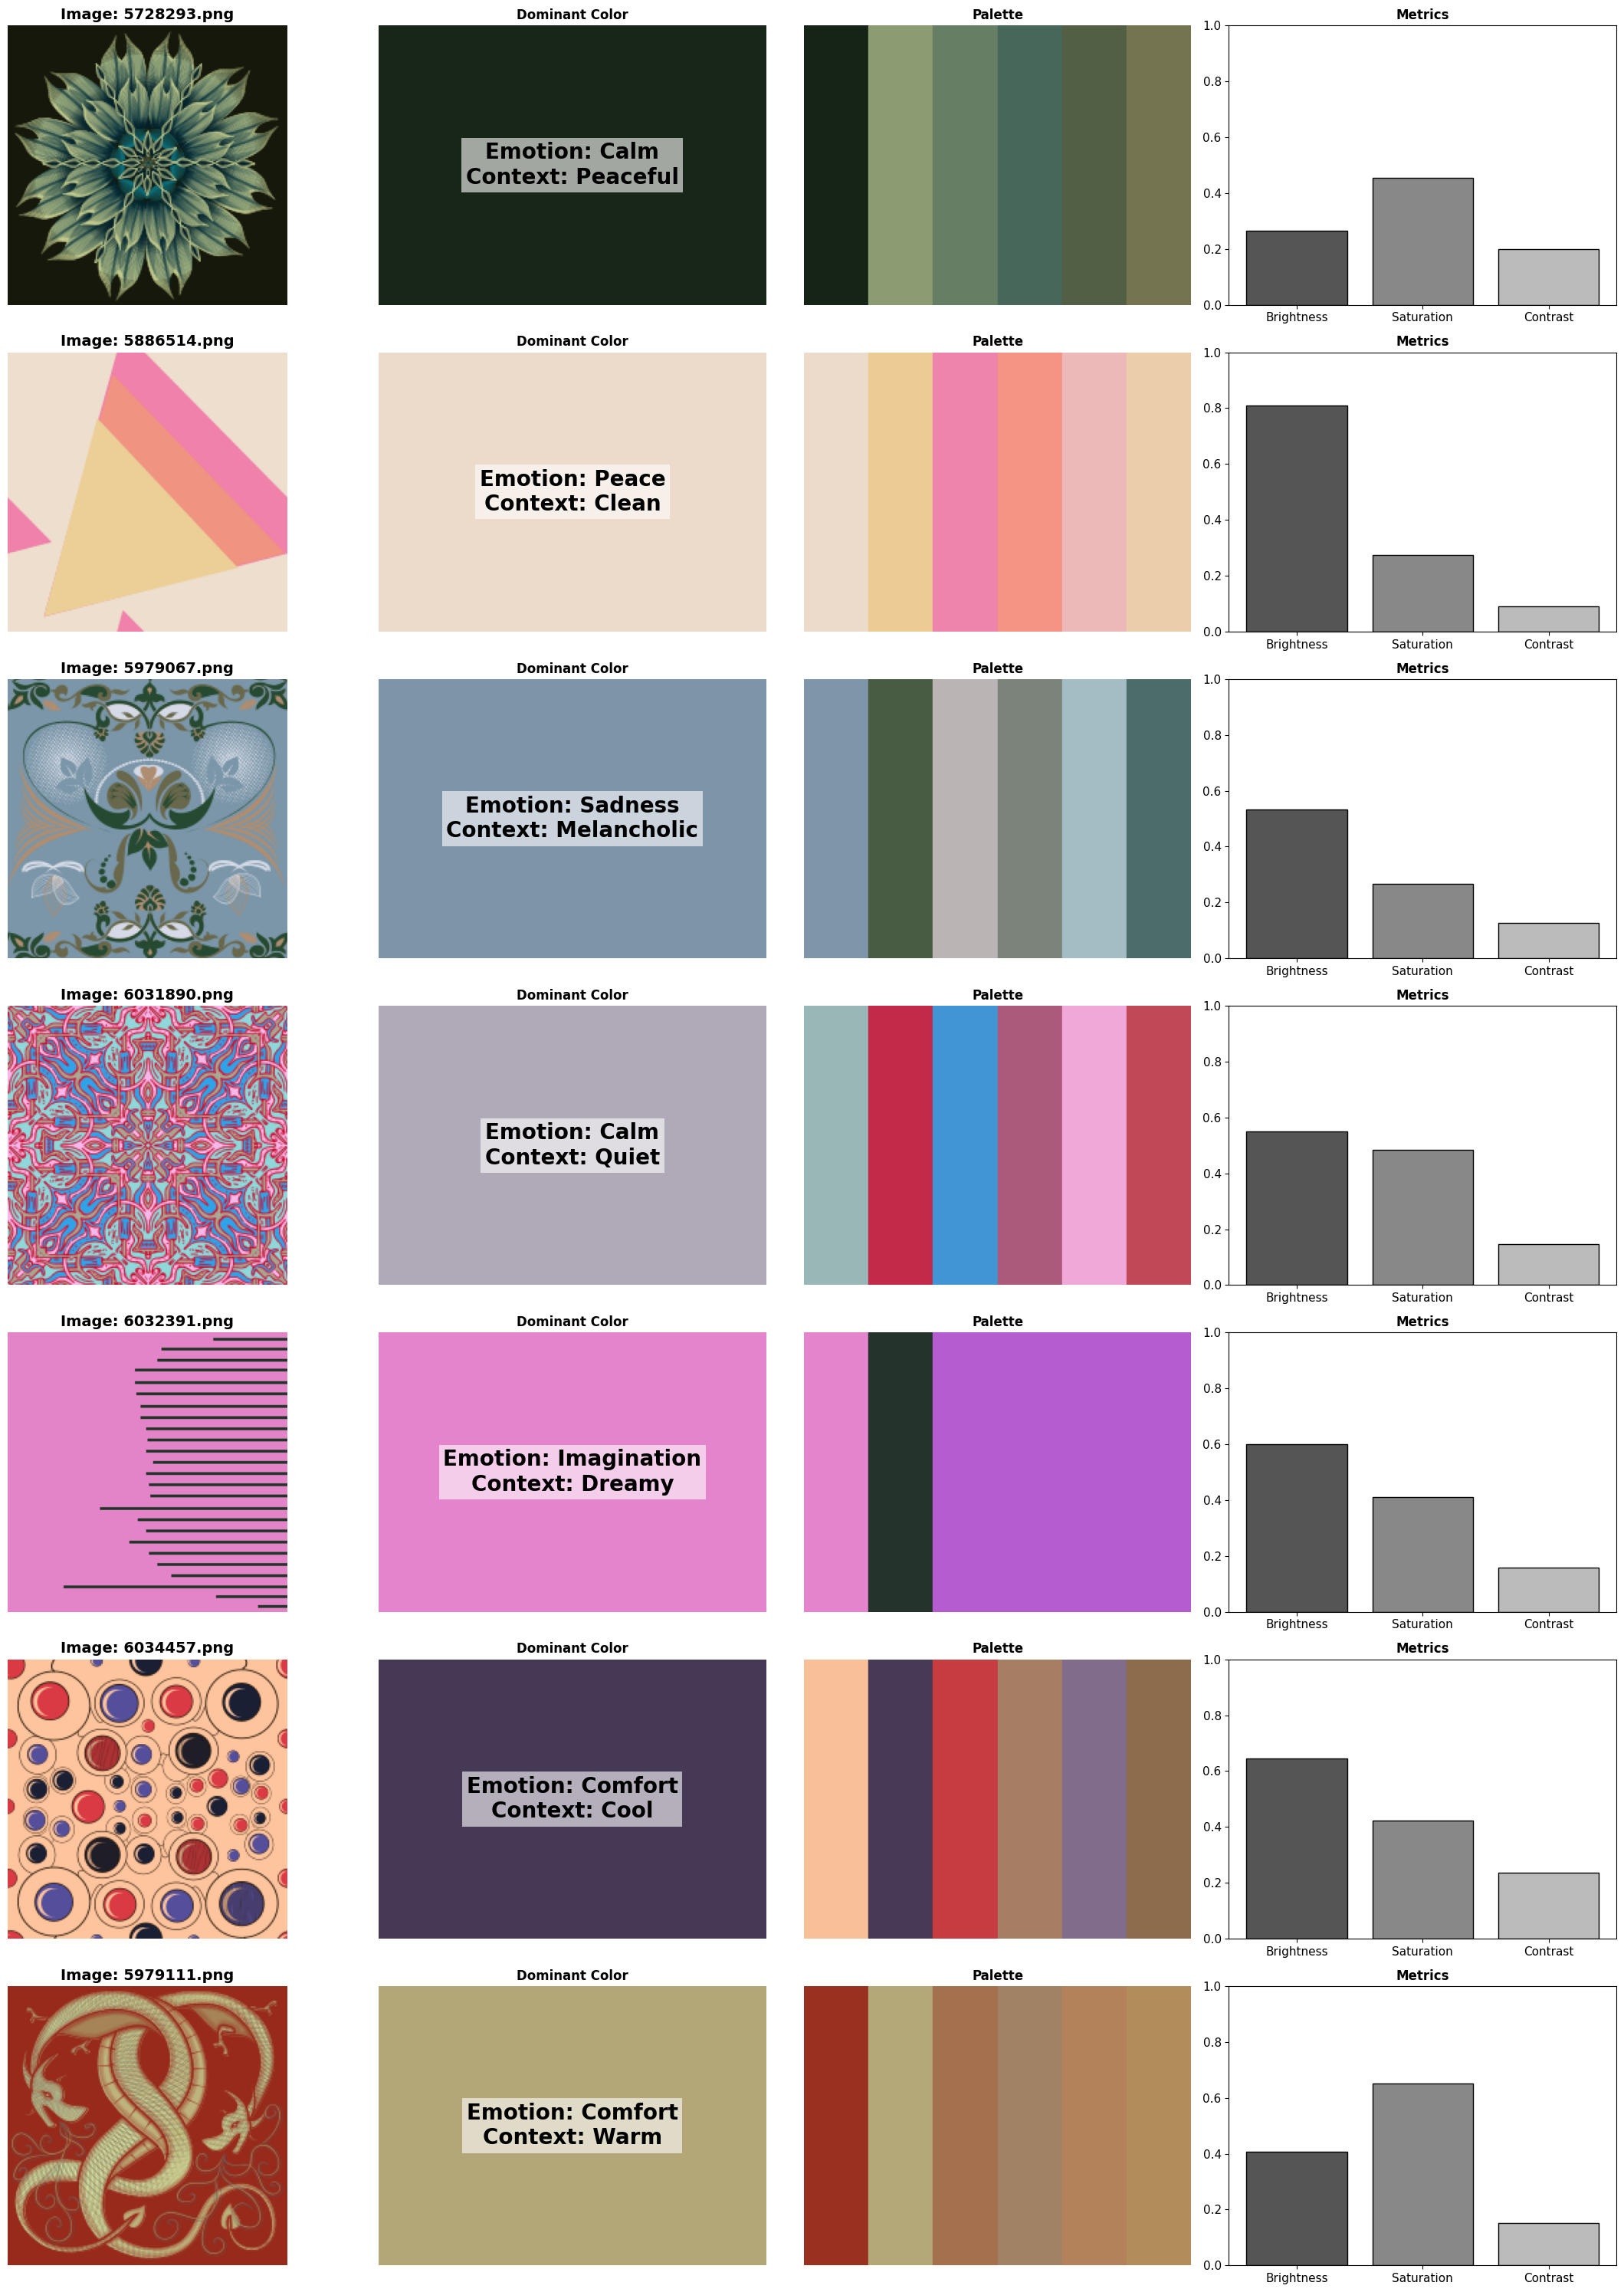

In [18]:
import random

sample_images = random.sample(data["images"], 7)

fig, axs = plt.subplots(7, 4, figsize=(22, 30))  # bigger figure for clarity

for row, img_data in enumerate(sample_images):
    plot_image_characteristics(axs[row], img_data)

plt.tight_layout()
plt.show()


In [19]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


ANALYSIS COMPLETE
